# Working with features. Total of [100 + 10 marks].

A) The code below is meant to return the position (using zero based numbering) of the 1020th to 1100th smallest elements of array a. It fails. By reshaping a, or otherwise, accomplish the task without using for loops. Total of [10 marks].

In [1]:
import numpy as np

a = np.array([list(range(1000)) + list(range(2000,1000,-1))])
np.argsort(a)[1020:1100]
# [0 - 999, 2000 - 1001]

array([], shape=(0, 2000), dtype=int64)

In [2]:
# Answer A) here 
# [10 marks]

# return the indices of the 1020th to 1100th smallest values in a
# (in any order)
np.argsort(a)[0][1019:1100]

array([1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970,
       1969, 1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959,
       1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949, 1948,
       1947, 1946, 1945, 1944, 1943, 1942, 1941, 1940, 1939, 1938, 1937,
       1936, 1935, 1934, 1933, 1932, 1931, 1930, 1929, 1928, 1927, 1926,
       1925, 1924, 1923, 1922, 1921, 1920, 1919, 1918, 1917, 1916, 1915,
       1914, 1913, 1912, 1911, 1910, 1909, 1908, 1907, 1906, 1905, 1904,
       1903, 1902, 1901, 1900], dtype=int64)

B) Find the  two nearest neigbor of the 5th element in a. Total of [10 marks].

In [3]:
# create array a.
a = np.array([list(range(5000))])
a = np.reshape(a, [1000, 5])

# find nearest neigbors of the fifth element
all_d = []
for i in range(a.shape[0]):
    d = np.linalg.norm(a[i] - a[5])
    all_d.append(d)
np.argsort(all_d)[1:3]

# rewrite the above code to eliminate the for loop

array([4, 6], dtype=int64)

In [4]:
# Answer B) here 
# [10 marks]
a = np.array([list(range(5000))])
a = np.reshape(a, [1000, 5])
# create a variable b to hold the value of the fifth row
b = np.tile(a[5], (1000,1)) 
# a - b means getting the difference between each row of a and b
c = np.linalg.norm(a - b, axis = 1)
# argsort will get the difference between the row in ascending order. start from 1 cause 0 will be equeal to row 5 - row 5 which is 0
np.argsort(c)[1:3]

array([4, 6], dtype=int64)

C) CLIP features make it possible to convert text to an image feature. Write code to convert the given images into CLIP features.  Use it to retrieve and display the top 10 images retrieved using key words: "cat", "cat face", and "panda playing". Provide code for retrieval using Euclidean distance and cosine distance. Total of [50 marks]. 

Dataset: https://drive.google.com/drive/folders/1cq6Wj0KPvuvrjBAQEDQdmltwvzh9uKhY?usp=sharing

CLIP network: https://huggingface.co/
o/

In [5]:
# Write code to convert images to CLIP features.
# Save the feature array and ground truth labels to harddisk.
# [10 marks].
import os
from PIL import Image
from sentence_transformers import SentenceTransformer

img_model = SentenceTransformer('clip-ViT-B-32')
images_cat = [Image.open(f'./animal_images/cats/{name}') for name in os.listdir('./animal_images/cats') if name.endswith('.jpg')]
images_dog = [Image.open(f'./animal_images/dogs/{name}') for name in os.listdir('./animal_images/dogs') if name.endswith('.jpg')]
images_panda = [Image.open(f'./animal_images/pandas/{name}') for name in os.listdir('./animal_images/pandas') if name.endswith('.jpg')]

animmal_images = images_cat + images_dog + images_panda
features = img_model.encode(animmal_images)


In [6]:
labels = []
for i in range(len(images_cat)):
    labels.append('cat')
for i in range(len(images_dog)):
    labels.append('dog')
for i in range(len(images_panda)):
    labels.append('panda')
labels = np.array(labels)
labels.shape


(3000,)

In [7]:
features.shape
type(features)
labels.shape

(3000,)

In [8]:
import pickle
pickle.dump(features, open('features.pkl', 'wb'))
pickle.dump(labels, open('labels.pkl', 'wb'))

In [9]:
# Write code to convert images to CLIP features.
# Load the feature array and ground truth labels from harddisk.
# [10 marks].

feature = pickle.load(open('features.pkl', 'rb'))
labels = pickle.load(open('labels.pkl', 'rb'))
feature.shape

(3000, 512)

In [10]:
# Write code to retrieve "cat" here. 
# Display the first 10 retreived images 
# [10 marks].

# Hint: First use CLIP model to convert the text into a feature; then perform nearest neigbor retrevial
import clip
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

cat_text = clip.tokenize(["cat"]).to(device)
with torch.no_grad():
    cat_text_features = model.encode_text(cat_text)

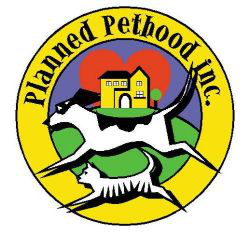

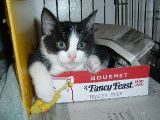

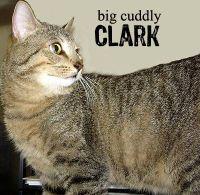

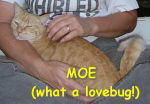

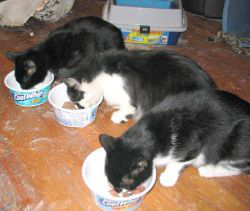

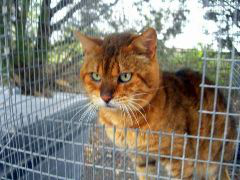

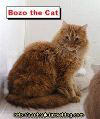

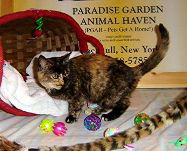

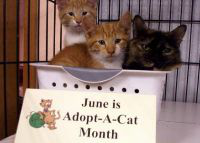

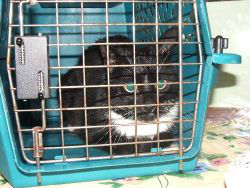

In [11]:
# Using Euclidean distance to find the closest 10 images

cat_text_features = cat_text_features.cpu().numpy()
euclidean_distance_cat = np.linalg.norm(feature - cat_text_features, axis = 1)
closest_10 = np.argsort(euclidean_distance_cat)[0:10]
matches = [animmal_images[idx] for idx in closest_10]
for match in matches:
    display(match)

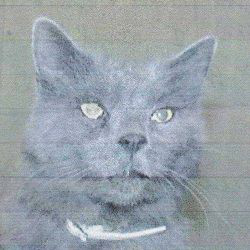

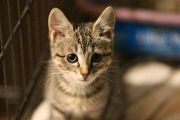

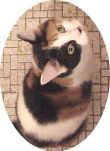

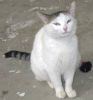

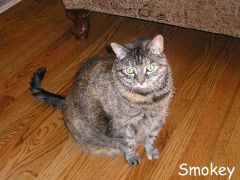

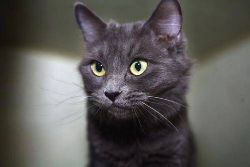

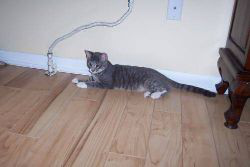

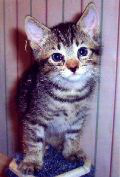

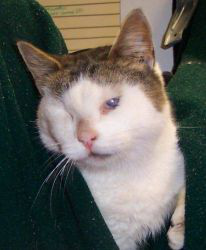

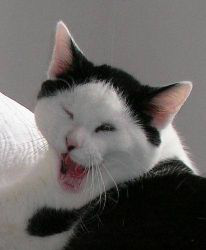

In [12]:
# Using Cosine distance to find the closest 10 images

from scipy.spatial.distance import cosine
cosine_distance_cat = []
re = cat_text_features.reshape(-1)
re.shape
for row in feature:    
    cosine_distance_cat.append(cosine(row, re))
closest_10 = np.argsort(cosine_distance_cat)[0:10]
matches = [animmal_images[idx] for idx in closest_10]
for match in matches:
    display(match)

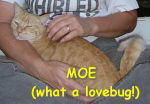

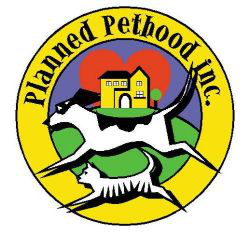

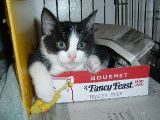

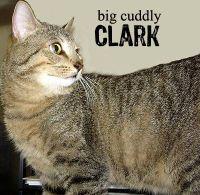

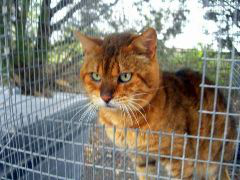

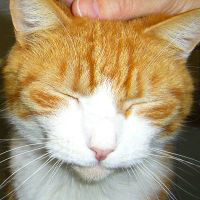

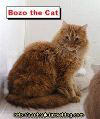

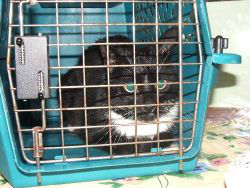

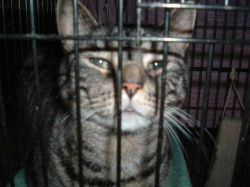

In [13]:
# write code to retrieve "cat face" here. 
# Display the first 10 retreived images.
# [10 marks].

cat_face_text = clip.tokenize(["cat face"]).to(device)
with torch.no_grad():
    cat_face_text_features = model.encode_text(cat_face_text)

# Using Euclidean Distance to find the closest 10 images
cat_face_text_features = cat_face_text_features.cpu().numpy()
c = np.linalg.norm(feature - cat_face_text_features, axis = 1)
closest_10 = np.argsort(c)[0:9]
matches = [animmal_images[idx] for idx in closest_10]
for match in matches:
    display(match)

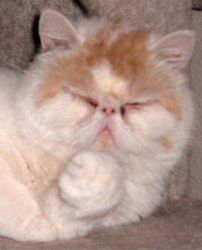

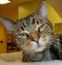

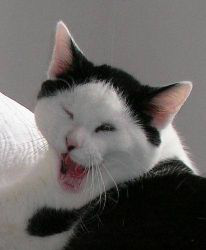

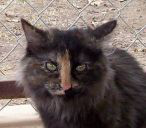

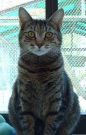

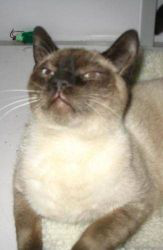

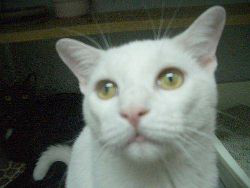

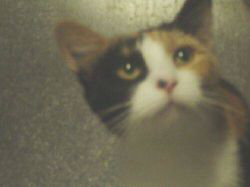

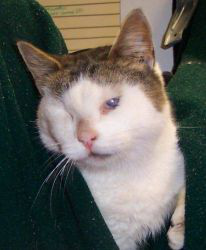

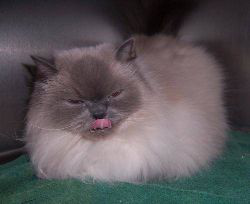

In [14]:
# Using Cosine Distance to find the closest 10 images
cosine_distance_cat_face = []
re = cat_face_text_features.reshape(-1)
re.shape
for row in feature:    
    cosine_distance_cat_face.append(cosine(row, re))
closest_10 = np.argsort(cosine_distance_cat_face)[0:10]
closest_10
matches = [animmal_images[idx] for idx in closest_10]
for match in matches:
    display(match)

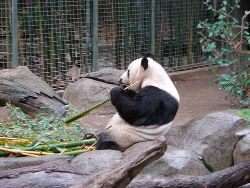

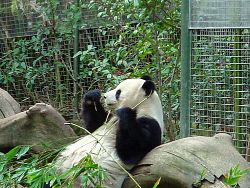

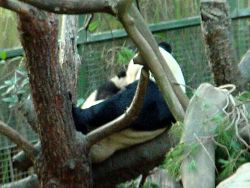

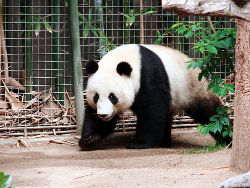

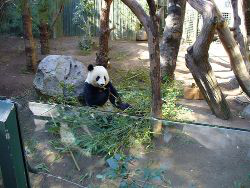

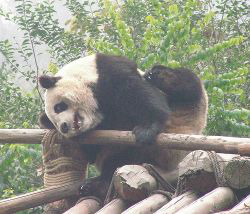

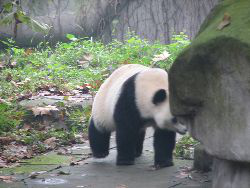

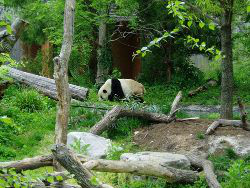

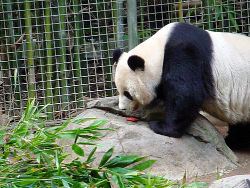

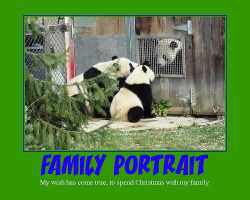

In [15]:
# write code to retrieve "panda playing" here. 
# Display the first 10 retreived images 
# [10 marks].

panda_playing_text = clip.tokenize(["panda playing"]).to(device)
with torch.no_grad():
    panda_playing_text_features = model.encode_text(panda_playing_text)

# Euclidean Distance to find the closest 10 images
panda_playing_text_features = panda_playing_text_features.cpu().numpy()
c = np.linalg.norm(feature - panda_playing_text_features, axis = 1)
closest_10 = np.argsort(c)[0:10]
matches = [animmal_images[idx] for idx in closest_10]
for match in matches:
    display(match)

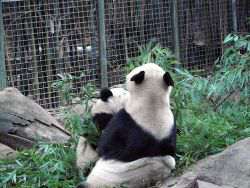

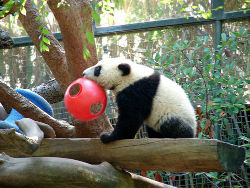

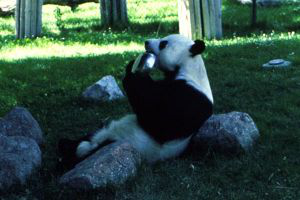

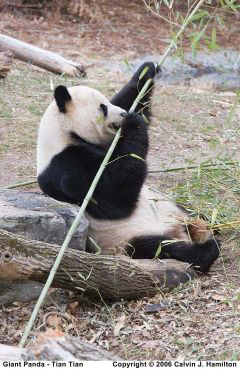

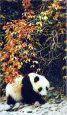

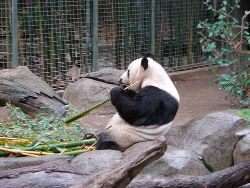

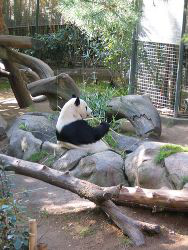

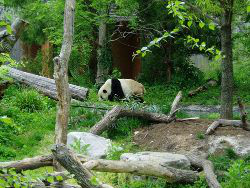

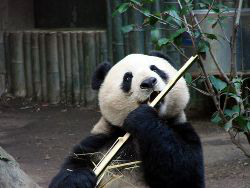

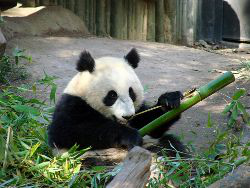

In [16]:
# Cosine Distance to find the closest 10 images

cosine_distance_panda = []
re = panda_playing_text_features.reshape(-1)
re.shape
for row in feature:    
    cosine_distance_panda.append(cosine(row, re))
closest_10 = np.argsort(cosine_distance_panda)[0:10]
closest_10
matches = [animmal_images[idx] for idx in closest_10]
for match in matches:
    display(match)

D) Divide the above features into training and testing sets. The training set should be composed of 80\% of the features. The testing set should be composed of 20% of the features. Use the training set to learn a kernel SVM; and report the accuracy on the testing set. Total of [30 marks].



In [17]:
# Write code to divide features into training and testing sets 
# [10 marks].
from sklearn.model_selection import train_test_split

data_train, data_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.20)

data_train.shape, data_test.shape, labels_train.shape, labels_test.shape


((2400, 512), (600, 512), (2400,), (600,))

In [18]:
# Write code to train the kernel SVM 
# [10 marks]. 
from sklearn.svm import SVC

classifier = SVC(kernel='rbf')
classifier.fit(data_train, labels_train)

SVC()

In [19]:
# Write code to evalute kernel SVM.
# Accuracy should be above 99%. 
# [10 marks].
from sklearn.metrics import accuracy_score, classification_report

classifier_pred = classifier.predict(data_test)

print("Accuracy of the SVM: ", accuracy_score(labels_test, classifier_pred))

print(classification_report(labels_test,classifier_pred))

Accuracy of the SVM:  0.9966666666666667
              precision    recall  f1-score   support

         cat       1.00      0.99      0.99       196
         dog       0.99      1.00      1.00       201
       panda       1.00      1.00      1.00       203

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



Bonus: Use one-class svm to learn a manifold that encapsulates the features of the cat class. Show that the learned manifold will separate the test cat features from other features. Evaluation should be in terms of AUROC. The solution requires substantial reading beyond the class syllabus. [10 marks].

In [20]:
# write code for training and testing one-class SVM 
# auroc should be above 98%
# [10 marks]

